In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.windows import Window

In [2]:
tiff5 = './assets/DHMVIIDSMRAS1m_k05.tif'
tiff12 = "./assets/DHMVIIDSMRAS1m_k12.tif"
tiff13 = "./assets/DHMVIIDSMRAS1m_k13.tif"


In [3]:
SHP12 = gpd.read_file('./assets/DHMVIIDSMRAS1m_k12/DHMVII_vdc_k12.shp')

## Geopandas tryout

In [4]:
SHP12.head()

,Date,Id,area,OpnDatum1,OpnDatum2,OpnDatum3,geometry
0,20140409,0,52900.0,2014-04-09,None,None,"POLYGON Z ((66000.000 216680.142 0.000, 65991...."
1,20140410,0,52900.0,2014-04-10,None,None,"POLYGON Z ((66000.000 216333.399 0.000, 66000...."
2,20140411,0,52900.0,2014-04-11,None,None,"POLYGON Z ((66000.000 211358.425 0.000, 66000...."
3,20140412,0,52900.0,2014-04-12,None,None,"MULTIPOLYGON Z (((43783.101 211695.977 0.000, ..."
4,20140413,0,52900.0,2014-04-13,None,None,"POLYGON Z ((66000.000 203518.374 0.000, 66000...."


In [5]:
type(SHP12)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

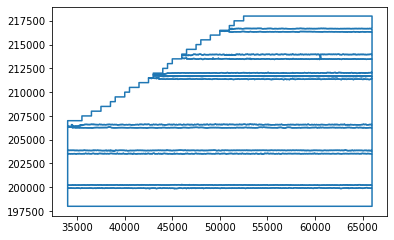

In [6]:
SHP12.boundary.plot() #only border info

## RasterIO

## CREATE RASTERIO DATASET OBJECT

In [7]:
geo12 = rasterio.open(tiff12)

## Get metadata

In [8]:
geo12.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 32000,
 'height': 20000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 34000.0,
        0.0, -1.0, 218000.0)}

## Get raterio dataset's bounds

In [9]:
geo12.bounds

BoundingBox(left=34000.0, bottom=198000.0, right=66000.0, top=218000.0)

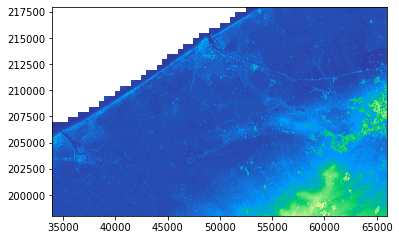

<AxesSubplot:>

In [10]:
rasterio.plot.show(geo12,cmap='terrain') #to big!


In [11]:
type(geo12)

rasterio.io.DatasetReader

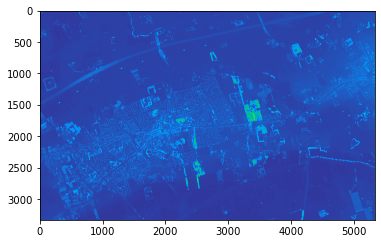

<AxesSubplot:>

In [32]:
import rasterio
width = 32000  #columns
height = 20000 #rows
with rasterio.open("./assets/DHMVIIDSMRAS1m_k12.tif") as src:
    w = src.read(1, window=Window(width/2, height/2, width/6, height/6))

rasterio.plot.show(w,cmap='terrain')

In [31]:
w.shape

(3333, 5333)

In [13]:
# data5 = rasterio.open(tiff5)

# show(data5)

In [14]:
# data13 = rasterio.open(tiff13)

# show(data13)

In [15]:
# data13.meta

## GDAL

In [16]:
# from osgeo import gdal
# import matplotlib.pyplot as plt

# dataset = gdal.Open(tiff12, gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
# band = dataset.GetRasterBand(1)
# arr = band.ReadAsArray()
# plt.imshow(arr)